In [1]:
import tensorflow as tf
import gopher
from gopher import saliency_embed
import os
import h5py
import numpy as np
import interp_utils
import pickle as pkl
from sklearn import model_selection
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

count = 3

2024-02-06 01:03:11.843430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def collapse_saliency(saliency,top_x):
    average_saliency = np.average(saliency,axis=-1)
    clean_saliency = saliency - np.repeat(average_saliency[:,:,np.newaxis],4,axis=2)
    #save grad times input
    input_grad = clean_saliency*top_x
    x_index = np.argmax(top_x, axis=2)
    input_sal = np.array([clean_saliency[i][range(len(top_x[0])),x_index[i]] for i in range(len(top_x))])

    return clean_saliency,input_sal

## CHIP

2024-02-06 01:03:58.784257: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78973 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:85:00.0, compute capability: 8.0
/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2024-02-06 01:03:59.445726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [500,200,4]
	 [[{{node Plac

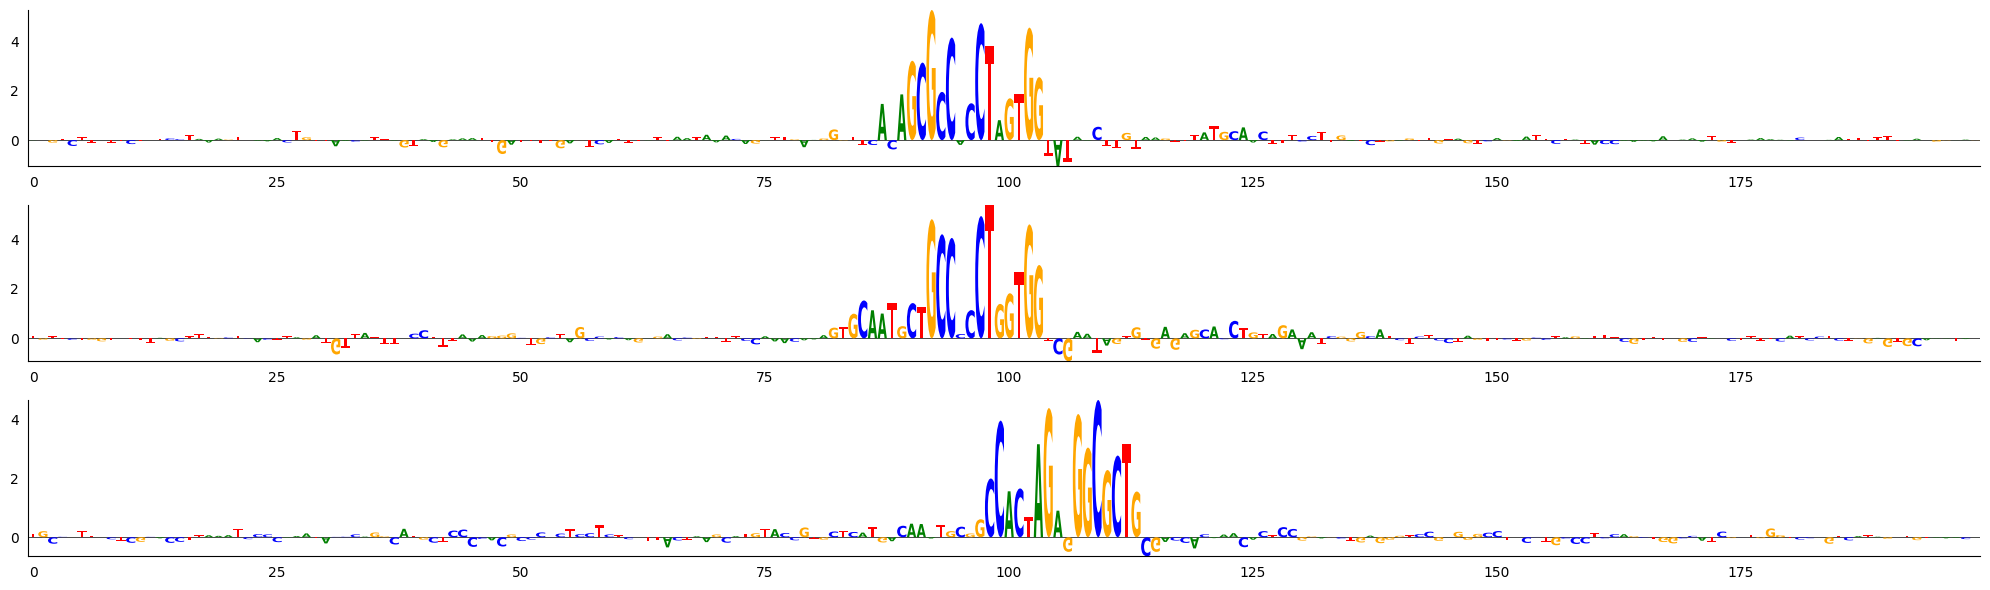

In [3]:
# Chip CNN
exp = 'CTCF'
top_x = np.load('./top_seq/chip/'+exp+'.npz')['arr_0']
top_x = np.swapaxes(top_x,1,2)
##CNN saliency map
model = tf.keras.models.load_model('../model/chip_model/chip_CNN/'+exp+'.h5')
input_layer = model.input 
logit_layer = model.layers[-2].output
logit_model = tf.keras.models.Model(input_layer,logit_layer)

explainer = saliency_embed.Explainer(logit_model, class_index=0,binary = True)
saliency_scores = explainer.saliency_maps(top_x)
clean_sal,input_sal = collapse_saliency(saliency_scores,top_x)

np.savez('./top_saliency/CNN_chip_'+exp+'.npz',np.swapaxes(clean_sal,1,2),input_sal)
interp_utils.plot_value_per_loc(top_x[:count],input_sal[:count], window=200)

## INSERT

2024-02-06 01:04:58.719361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [500,173,4]
	 [[{{node Placeholder/_0}}]]


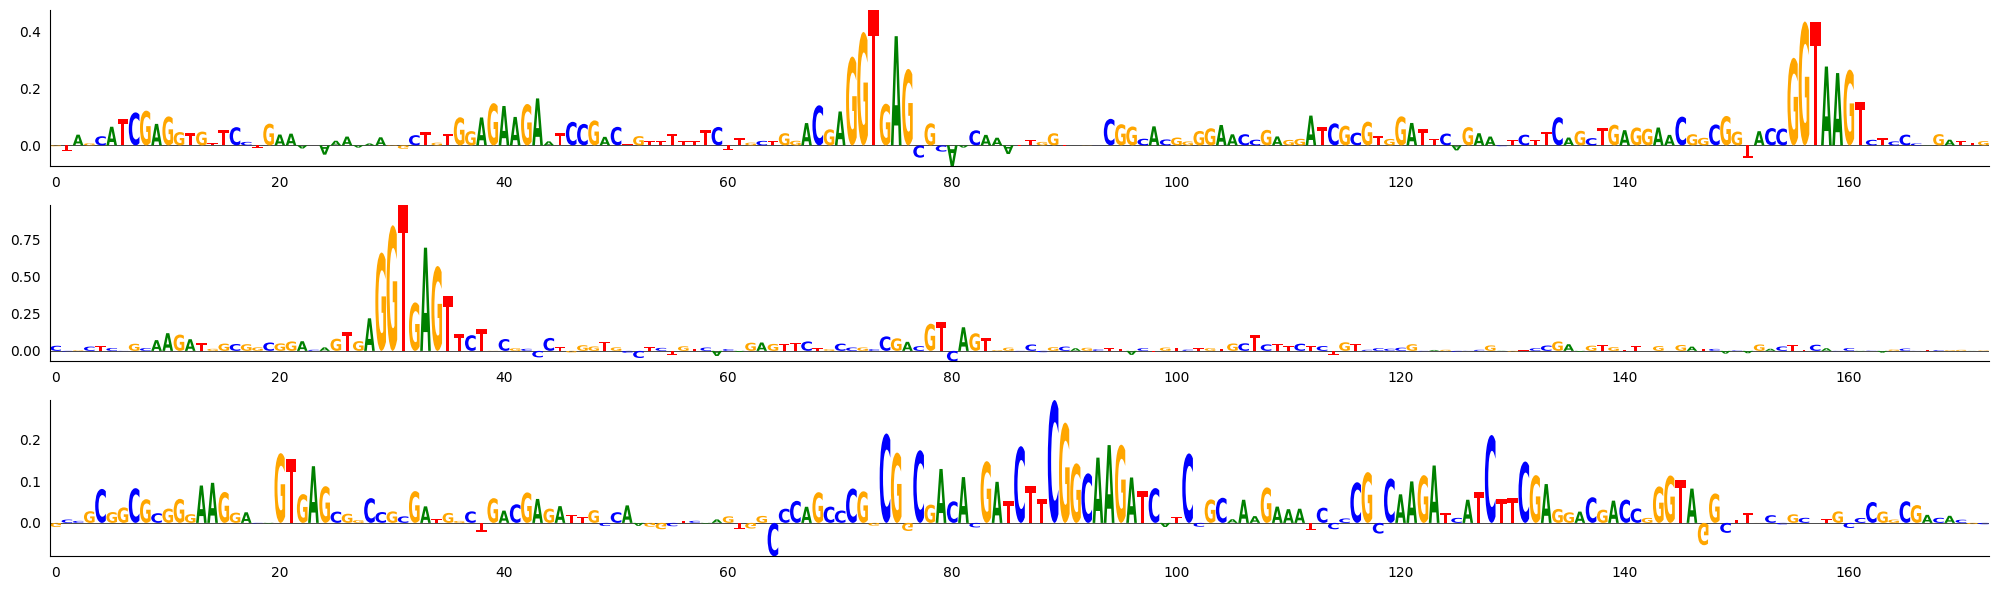

In [6]:
top_x = np.load('./top_seq/insert.npz')['arr_0']
top_x = np.swapaxes(top_x,1,2)
logit_model = tf.keras.models.load_model('../model/RNAenlong/CNN.h5')
explainer = saliency_embed.Explainer(logit_model, class_index=0,binary = True)
saliency_scores = explainer.saliency_maps(top_x)
clean_sal,input_sal = collapse_saliency(saliency_scores,top_x)

np.savez('./top_saliency/CNN_insert.npz',np.swapaxes(clean_sal,1,2),input_sal)
interp_utils.plot_value_per_loc(top_x[:count],input_sal[:count], window=200)


## CLIP

/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2024-02-06 01:05:22.518415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [500,200,4]
	 [[{{node Placeholder/_0}}]]


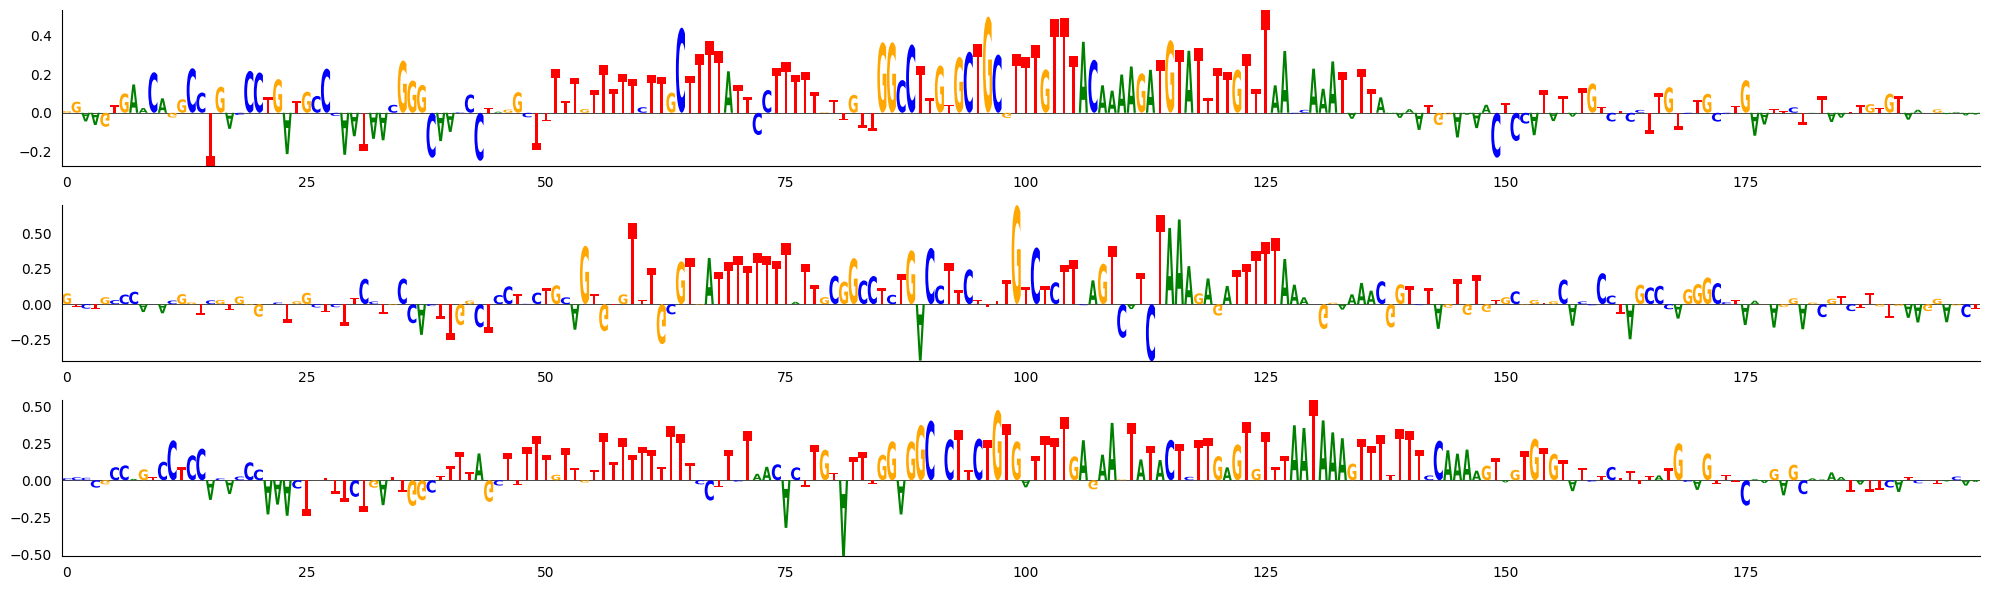

In [7]:
# eClip CNN
exp = 'TIA1'
top_x = np.load('./top_seq/clip/'+exp+'.npz')['arr_0']
top_x = np.swapaxes(top_x,1,2)

model = tf.keras.models.load_model('../model/clip_model/eclip_CNN/'+exp+'.h5')
input_layer = model.input 
logit_layer = model.layers[-2].output
logit_model = tf.keras.models.Model(input_layer,logit_layer)

explainer = saliency_embed.Explainer(logit_model, class_index=0,binary = True)
saliency_scores = explainer.saliency_maps(top_x)
clean_sal,input_sal = collapse_saliency(saliency_scores,top_x)

np.savez('./top_saliency/CNN_clip_'+exp+'.npz',np.swapaxes(clean_sal,1,2),input_sal)
interp_utils.plot_value_per_loc(top_x[:count],input_sal[:count], window=200)

## Lenti

/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2024-02-06 01:06:03.131960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype half and shape [500,230,4]
	 [[{{node Placeholder/_0}}]]


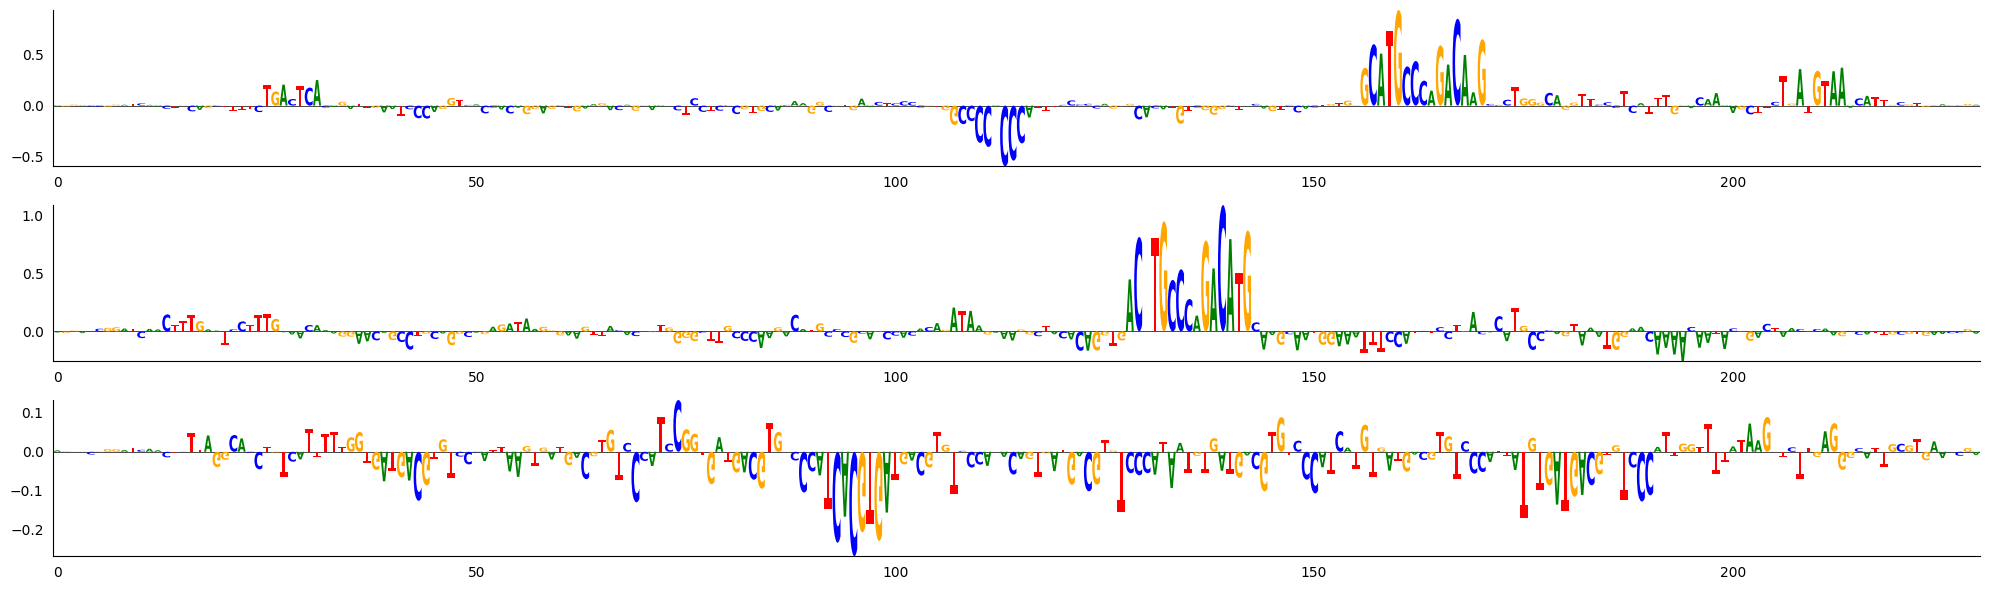

In [9]:
ct = 'HepG2'
top_x = np.load('./top_seq/lenti_'+ct+'.npz')['arr_0']
top_x = np.swapaxes(top_x,1,2)

model = tf.keras.models.load_model('../model/lenti_MPRA/lenti_MPRA_onehot/'+ct+'/ResNet.h5')
explainer = saliency_embed.Explainer(model, class_index=0,binary = True)
saliency_scores = explainer.saliency_maps(top_x)
clean_sal,input_sal = collapse_saliency(saliency_scores,top_x)

np.savez('./top_saliency/CNN_lenti_'+ct+'.npz',np.swapaxes(clean_sal,1,2),input_sal)
interp_utils.plot_value_per_loc(top_x[:count],input_sal[:count], window=200)
